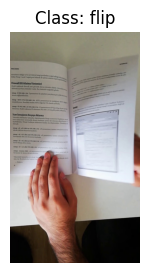

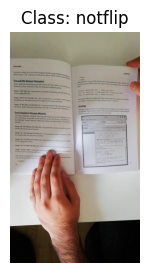

Folder: C:/Users/M-ODE/Desktop/Apziva/projects/4th Project/data/images/training
Number of classes: 2
Number of samples: 2392
Image Dimensions: Counter({(1920, 1080): 2392})


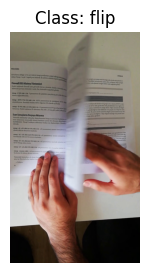

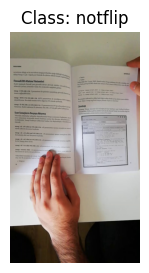

Folder: C:/Users/M-ODE/Desktop/Apziva/projects/4th Project/data/images/testing
Number of classes: 2
Number of samples: 597
Image Dimensions: Counter({(1920, 1080): 597})


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Define the paths to your training and testing folders
train_folder = 'C:/Users/M-ODE/Desktop/Apziva/projects/4th Project/data/images/training'
test_folder = 'C:/Users/M-ODE/Desktop/Apziva/projects/4th Project/data/images/testing'

# Function to gather statistics and display sample images
def stats_and_display(folder):
    classes = os.listdir(folder)
    num_samples = 0
    dimensions = []

    # Count samples in each class +  image dimensions
    for class_name in classes:
        class_path = os.path.join(folder, class_name)
        samples = os.listdir(class_path)

        num_samples += len(samples)

        for i, sample_name in enumerate(samples):
            sample_path = os.path.join(class_path, sample_name)

            # Load image
            image = cv2.imread(sample_path)
            dimensions.append(image.shape[:2])  # 2D images

            # Display the first image in each class
            if i == 0:
                plt.figure(figsize=(3, 3))
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.title(f"Class: {class_name}")
                plt.axis('off')
                plt.show()

    # Display stats
    print(f"Folder: {folder}")
    print(f"Number of classes: {len(classes)}")
    print(f"Number of samples: {num_samples}")
    print(f"Image Dimensions: {Counter(dimensions)}")

# Gather statistics and display samples from the training data
stats_and_display(train_folder)

# Gather statistics and display samples from the testing data
stats_and_display(test_folder)


In [2]:
#Function for f1 score for keras
from keras import backend as K
def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# the model outputs : 3D feature maps (height, width, features)

In [4]:
model.add(Flatten())  # convert 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['Accuracy',get_f1])

In [6]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 16

# augmentation configuration ; Training 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# augmentation configuration ; Testing ;  rescaling
test_datagen = ImageDataGenerator(rescale=1./255)
data_dir='C:/Users/M-ODE/Desktop/Apziva/projects/4th Project/data/images/'

# read images and generate batches of augmented image data 
train_generator = train_datagen.flow_from_directory(
        data_dir+'training',  
        target_size=(150, 150),  # resize to 150x150
        batch_size=batch_size,
        class_mode='binary')  # binary labels

# generator; validation data
validation_generator = test_datagen.flow_from_directory(
        data_dir+'testing',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2392 images belonging to 2 classes.
Found 597 images belonging to 2 classes.


In [8]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('model.h5')  

C:\Users\M-ODE\AppData\Local\Temp\ipykernel_10616\606008489.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
125/125 [==============================] - 72s 574ms/step - loss: 0.6078 - Accuracy: 0.6702 - get_f1: 0.6746
Epoch 2/10
125/125 [==============================] - 73s 582ms/step - loss: 0.5145 - Accuracy: 0.7595 - get_f1: 0.7514
Epoch 3/10
125/125 [==============================] - 65s 520ms/step - loss: 0.4376 - Accuracy: 0.8143 - get_f1: 0.8161
Epoch 4/10
125/125 [==============================] - 68s 540ms/step - loss: 0.3762 - Accuracy: 0.8524 - get_f1: 0.8489
Epoch 5/10
125/125 [==============================] - 65s 522ms/step - loss: 0.3260 - Accuracy: 0.8650 - get_f1: 0.8568
Epoch 6/10
125/125 [==============================] - 73s 584ms/step - loss: 0.2889 - Accuracy: 0.8845 - get_f1: 0.8791
Epoch 7/10
125/125 [==============================] - 89s 706ms/step - loss: 0.2634 - Accuracy: 0.8971 - get_f1: 0.8891
Epoch 8/10
125/125 [==============================] - 69s 549ms/step - loss: 0.2468 - Accuracy: 0.9036 - get_f1: 0.8948
Epoch 9/10
125/125 [====================